Link to GitHub repository [here](https://github.com/jesp9435/ComSocSci)

Group member contributions: Both group members contributed equally to the parts of the assignment. We have worked collaboratively on all parts. 

# Part 1: Properties of the real-world network of Computational Social Scientists

In [76]:
# Relevant imports:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import networkx as nx
import netwulf as nw
import numpy as np
import pickle
import random
import copy

In [63]:
# These numbers were found in Assignment 1
amount_of_nodes = 14196
amount_of_edges = 54304

# We use equation 3.2 from the book and solve for p:
probability = amount_of_edges/((amount_of_nodes*(amount_of_nodes-1))/2)
print("Probability: " + str(probability))

# The average degree can be found from equation 3.3:
k = probability*(amount_of_nodes-1.0)
print("Average degree: " + str(k))

# Generating a Random Network with node count mirroring Computational Social Scientists network
# using our calculated probability:
RG = nx.gnp_random_graph(amount_of_nodes, probability, seed=1000, directed=False)
#nw.interactive.visualize(RG)

Probability: 0.0005389648330011947
Average degree: 7.650605804451958


Our Random Network falls into the supercritical regime, since the average degree is above the critical point (k > 1). \
The Random Network almost resembles one giant component, since almost all nodes are contained in one giant cluster. \
In comparison, the network of Computational Social Scientists has a lot of different sized clusters and groupings and much more variation. 

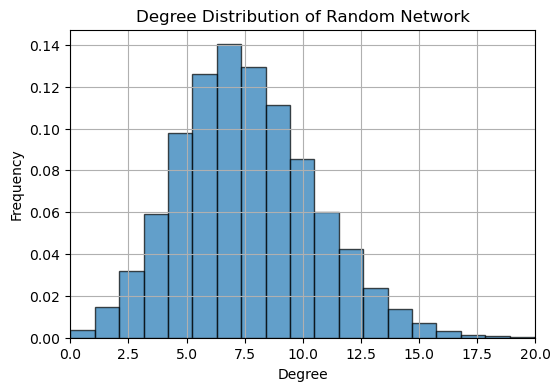

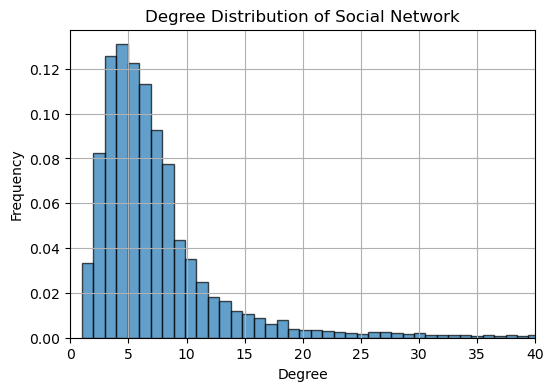

In [64]:
# Computing distribution of degree for the random network:
degrees_random = [degree for node, degree in RG.degree()]
hist, bins = np.histogram(degrees_random, bins=20, density=True)

# Plotting the degree distribution for the random network
plt.figure(figsize=(6, 4))
plt.hist(degrees_random, bins=bins, density=True, alpha=0.7, edgecolor = "black")
plt.xlabel('Degree')
plt.xlim(0,20)
plt.ylabel('Frequency')
plt.title('Degree Distribution of Random Network')
plt.grid(True)
plt.show()

# Accessing the network from Assignment 1:
with open("my_network.pickle", "rb") as f:
    G = pickle.load(f)

# Computing distribution of degree for the Social network:
degrees_social = [degree for node, degree in G.degree()]
hist, bins = np.histogram(degrees_social, bins=200, density=False)

# Plotting the degree distribution for social network
plt.figure(figsize=(6, 4))
plt.hist(degrees_social, bins=bins, density=True, alpha=0.7, edgecolor = "black")
plt.xlabel('Degree')
plt.xlim(0,40)
plt.ylabel('Frequency')
plt.title('Degree Distribution of Social Network')
plt.grid(True)
plt.show()




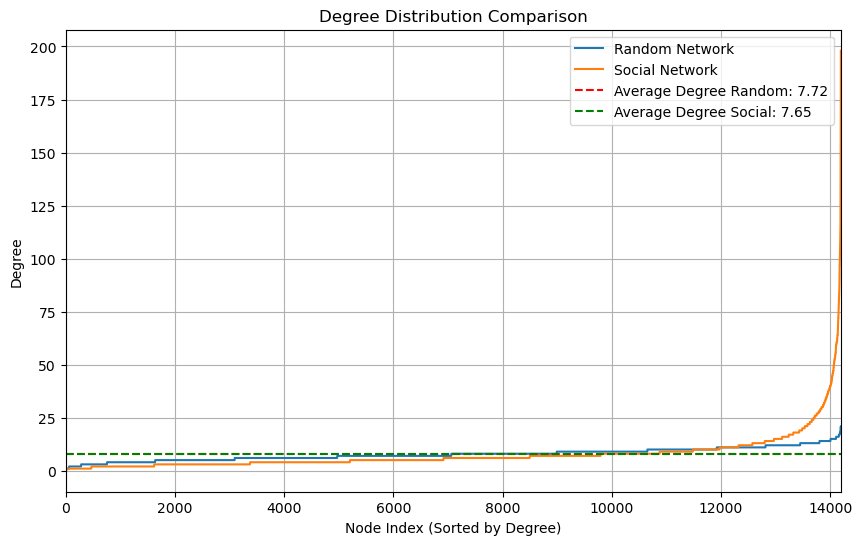

In [70]:
# Average degree for random and social networks
avg_degree_random = np.mean(degrees_random)
avg_degree_social = np.mean(degrees_social)

# Plotting both degree distributions
plt.figure(figsize=(10, 6))
plt.plot(sorted(degrees_random), label='Random Network')
plt.plot(sorted(degrees_social), label='Social Network')
plt.xlabel('Node Index (Sorted by Degree)')
plt.ylabel('Degree')
plt.title('Degree Distribution Comparison')
plt.grid(True)
plt.legend()

# Adding the vertical lines for average degree
plt.axhline(y=avg_degree_random, color='r', linestyle='--', label=f'Average Degree Random: {avg_degree_random:.2f}')
plt.axhline(y=avg_degree_social, color='g', linestyle='--', label=f'Average Degree Social: {avg_degree_social:.2f}')

plt.xlim(0, len(degrees_random))

plt.legend()
plt.show()


The average degree in the social network is 7.65, whilst it is 7.72 in the Random. These averages are closely related, thus one may assume the random network is representative of the social network. However this is not the case if you look at the distribution for the social and the random network. The social network is very left skewed, whereas the random network is only slightly left skewed. Thus the random network is limited in capturing the actual skewness in the social network. 

The difference in the social and the random networks skewness is also captured in the degree distribution comparison graph, where the random network shown by the blue line is within 15 degrees of the average degree, whilst the social network has nodes with much greater degrees.

# Part 2: Network Analysis in Computational Social Science

In [66]:
# Part 1: Assortativity Coefficient
# This function calculates the Assortativity Coefficient for the network based on the country of each node:
def assortativity_coefficient(G, attribute):
    m = G.number_of_edges()
    k = sum(dict(G.degree()).values())
    e_i = 0
    a_i = 0
    for u, v in G.edges():
        if G.nodes[u][attribute] == G.nodes[v][attribute]:
            e_i += G.degree[u] * G.degree[v]
        a_i += G.degree[u] + G.degree[v]
    r = (e_i / m - (0.5 * a_i / m)**2) / (0.5 * a_i / m - (0.5 * a_i / m)**2)
    return r

# Using the function to calculate the Assortativity Coefficient:
assortativity = assortativity_coefficient(G, 'country_code')
print("Assortativity coefficient based on country attribute:", assortativity)


Assortativity coefficient based on country attribute: 0.6630008894313671


<font color="red">OBS!!
The code below is our attempt at the algorithm. But since we have to go through more than half a million swaps, the code takes so long to run, that we haven't yet gotten it to terminate. This makes the following parts of the exercise impossible to solve, since they rely on this algorithm. 

In [ ]:
# Part 2: Configuration model
def double_edge_swap(original_network, num_swaps=10):
    randomized_network = copy.deepcopy(original_network)
    total_edges = original_network.number_of_edges()
    
    # Perform E*10 swaps
    for _ in range(num_swaps * total_edges):  
        # Select two random edges
        print(_+1, "/", num_swaps*total_edges)
        e1, e2 = random.sample(list(randomized_network.edges()), 2)
        u, v = e1
        x, y = e2
        # Ensure u != y and v != x
        if u == y or v == x:
            continue
        if random.random() < 0.5:
            e1 = (v, u)
        # Ensure that new edges e'1 and e'2 do not already exist in the network
        e1_ = (e1[0], e2[1])
        e2_ = (e2[0], e1[1])
        if e1_ in randomized_network.edges() or e2_ in randomized_network.edges():
            continue
        
        # Remove edges e1 and e2 and add edges e'1 and e'2
        randomized_network.remove_edges_from([e1, e2])
        randomized_network.add_edges_from([e1_, e2_])
    
    return randomized_network

original_network = G

# Call the double_edge_swap function with our network
randomized_network = double_edge_swap(original_network)

# Here we verify that the algorithm works by checking the degree sequence
original_degrees = sorted([d for n, d in original_network.degree()])
randomized_degrees = sorted([d for n, d in randomized_network.degree()])
assert original_degrees == randomized_degrees, "Error"



Flipping edges 50% of the time in the configuration model should help remove potential bias. It prevents the new network from being influenced too much by the original edge order. By doing this, we ensure that the resulting random network is truly random and not skewed by the way the edges were initially arranged.

# Part 3: Words that characterize Computational Social Science communities

##### Exercise 1: TF-IDF and the Computational Social Science communities

* TF-IDF is a statistical measure used in natural language processing and information retrieval to evaluate the importance of a word in a document within a larger collection of documents. The main purpose of TF-IDF is to highlight words that are significant to a specific document while downplaying words that are common across many documents.
* TF stands for Term Frequency and is simply, as the name suggests, a calculation of the frequency of a term in a specific document. 
* IDF stands for Inverse Document Frequency and is a measure of a terms's rarity across all documents in the collection.